# Loan Tap Business Case 

# About Loan Tap:
LoanTap is an online platform committed to delivering customized loan products to millennials. 
They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly 
terms to salaried professionals and businessmen.
The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of 
MSMEs as well as individuals.

# Problem Statement:

### 1. Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
### 2. If so, what should the repayment terms be in business recommendations?


### Note : Target Variable is the Loan Status.


# Please refer to the last for Insights and Recommendations.

## Feature Information

In [1]:
# loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
# term : The number of payments on the loan. Values are in months and can be either 36 or 60.
# int_rate : Interest Rate on the loan
# installment : The monthly payment owed by the borrower if the loan originates.
# grade : LoanTap assigned loan grade
# sub_grade : LoanTap assigned loan subgrade
# emp_title :The job title supplied by the Borrower when applying for the loan.*
# emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
# home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
# annual_inc : The self-reported annual income provided by the borrower during registration.
# verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
# issue_d : The month which the loan was funded
# loan_status : Current status of the loan - Target Variable
# purpose : A category provided by the borrower for the loan request.
# title : The loan title provided by the borrower
# dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
# earliest_cr_line :The month the borrower's earliest reported credit line was opened
# open_acc : The number of open credit lines in the borrower's credit file.
# pub_rec : Number of derogatory public records
# revol_bal : Total credit revolving balance
# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# total_acc : The total number of credit lines currently in the borrower's credit file
# initial_list_status : The initial listing status of the loan. Possible values are – W, F
# application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
# mort_acc : Number of mortgage accounts.
# pub_rec_bankruptcies : Number of public record bankruptcies
# Address: Address of the individual

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df  = pd.read_csv("Loantapdata.csv")

# Statistical Summary 

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.shape

(396030, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Non Graphical Analysis

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
columns = df.columns

In [10]:
for i in columns:
    print( i , ":\n" , df[i].value_counts(normalize=True , sort = True))
    print(i , ":" , df[i].nunique())
    print("\n")

loan_amnt :
 10000.0    0.069863
12000.0    0.053950
15000.0    0.050256
20000.0    0.047898
35000.0    0.036805
             ...   
37450.0    0.000003
36775.0    0.000003
725.0      0.000003
36225.0    0.000003
35475.0    0.000003
Name: loan_amnt, Length: 1397, dtype: float64
loan_amnt : 1397


term :
  36 months    0.762581
 60 months    0.237419
Name: term, dtype: float64
term : 2


int_rate :
 10.99    0.031339
12.99    0.024321
15.61    0.023609
11.99    0.021670
8.90     0.020248
           ...   
14.28    0.000003
18.72    0.000003
30.84    0.000003
24.40    0.000003
24.59    0.000003
Name: int_rate, Length: 566, dtype: float64
int_rate : 566


installment :
 327.34    0.002444
332.10    0.001997
491.01    0.001858
336.90    0.001732
392.81    0.001725
            ...   
785.23    0.000003
160.97    0.000003
160.03    0.000003
599.45    0.000003
256.00    0.000003
Name: installment, Length: 55706, dtype: float64
installment : 55706


grade :
 B    0.292953
C    0.267624
A    0.

In [11]:
for i in columns:
    print(i , ":" , df[i].nunique())

loan_amnt : 1397
term : 2
int_rate : 566
installment : 55706
grade : 7
sub_grade : 35
emp_title : 173105
emp_length : 11
home_ownership : 6
annual_inc : 27197
verification_status : 3
issue_d : 115
loan_status : 2
purpose : 14
title : 48817
dti : 4262
earliest_cr_line : 684
open_acc : 61
pub_rec : 20
revol_bal : 55622
revol_util : 1226
total_acc : 118
initial_list_status : 2
application_type : 3
mort_acc : 33
pub_rec_bankruptcies : 9
address : 393700


In [12]:
df["loan_status"].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [13]:
# As per inutition and Analysis , changing few features of the data

In [14]:
newdf = df.copy()

In [15]:
newdf.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [16]:
newdf.drop(["issue_d" , "title" , "earliest_cr_line"] ,axis = 1 , inplace = True)

In [17]:
newdf.shape

(396030, 24)

In [18]:
columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [19]:
newdf["term"] = newdf["term"].str.lstrip()
newdf["term"] = newdf["term"].apply(lambda x : x[:2])
newdf["term"] = newdf["term"].astype('float64')

In [20]:
def coverting_employee_length(x):
    if x == "10+ years":
        return 10
    elif x == "< 1 year":
        return 0
    elif x == "2 years":
        return 2
    elif x == "3 years":
        return 3
    elif x == "4 years":
        return 4
    elif x == "5 years":
        return 5
    elif x == "6 years":
        return 6
    elif x == "7 years":
        return 7
    elif x == "8 years":
        return 8
    elif x == "9 years":
        return 9
    elif x == "1 year":
        return 1
    else :
        return 5
    
    
    


In [21]:
newdf["emp_length"] = newdf["emp_length"].apply(coverting_employee_length)

In [22]:
newdf["emp_length"] = newdf["emp_length"].astype("float64")

In [23]:
newdf["Pincode"] = newdf["address"].apply(lambda x : x[-1:-6:-1])

In [24]:
newdf.drop(["address"] , axis = 1 , inplace = True)

In [25]:
newdf.shape

(396030, 24)

In [26]:
newdf.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,5.895205,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,3.565840,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,3.000000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.000000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,10.000000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,10.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [27]:
newdfcols = newdf.columns

In [28]:
object_column_list = []
numerical_column_list = []
for i in newdfcols:
    if newdf[i].dtype == "object":
        object_column_list.append(i)
    else:
        numerical_column_list.append(i)
        

In [29]:
numerical_column_list

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [30]:
object_column_list.remove("emp_title")

In [31]:
object_column_list

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'Pincode']

In [32]:
text_column_list = ["emp_title" , "Pincode"]

According to the analysis performed , we have seggregated numerical , object and text features.
Above all the columns are printed for better understanding.

# Graphical Analysis 

## Univariate Analysis 

###  - Feauture Distribution Analysis 

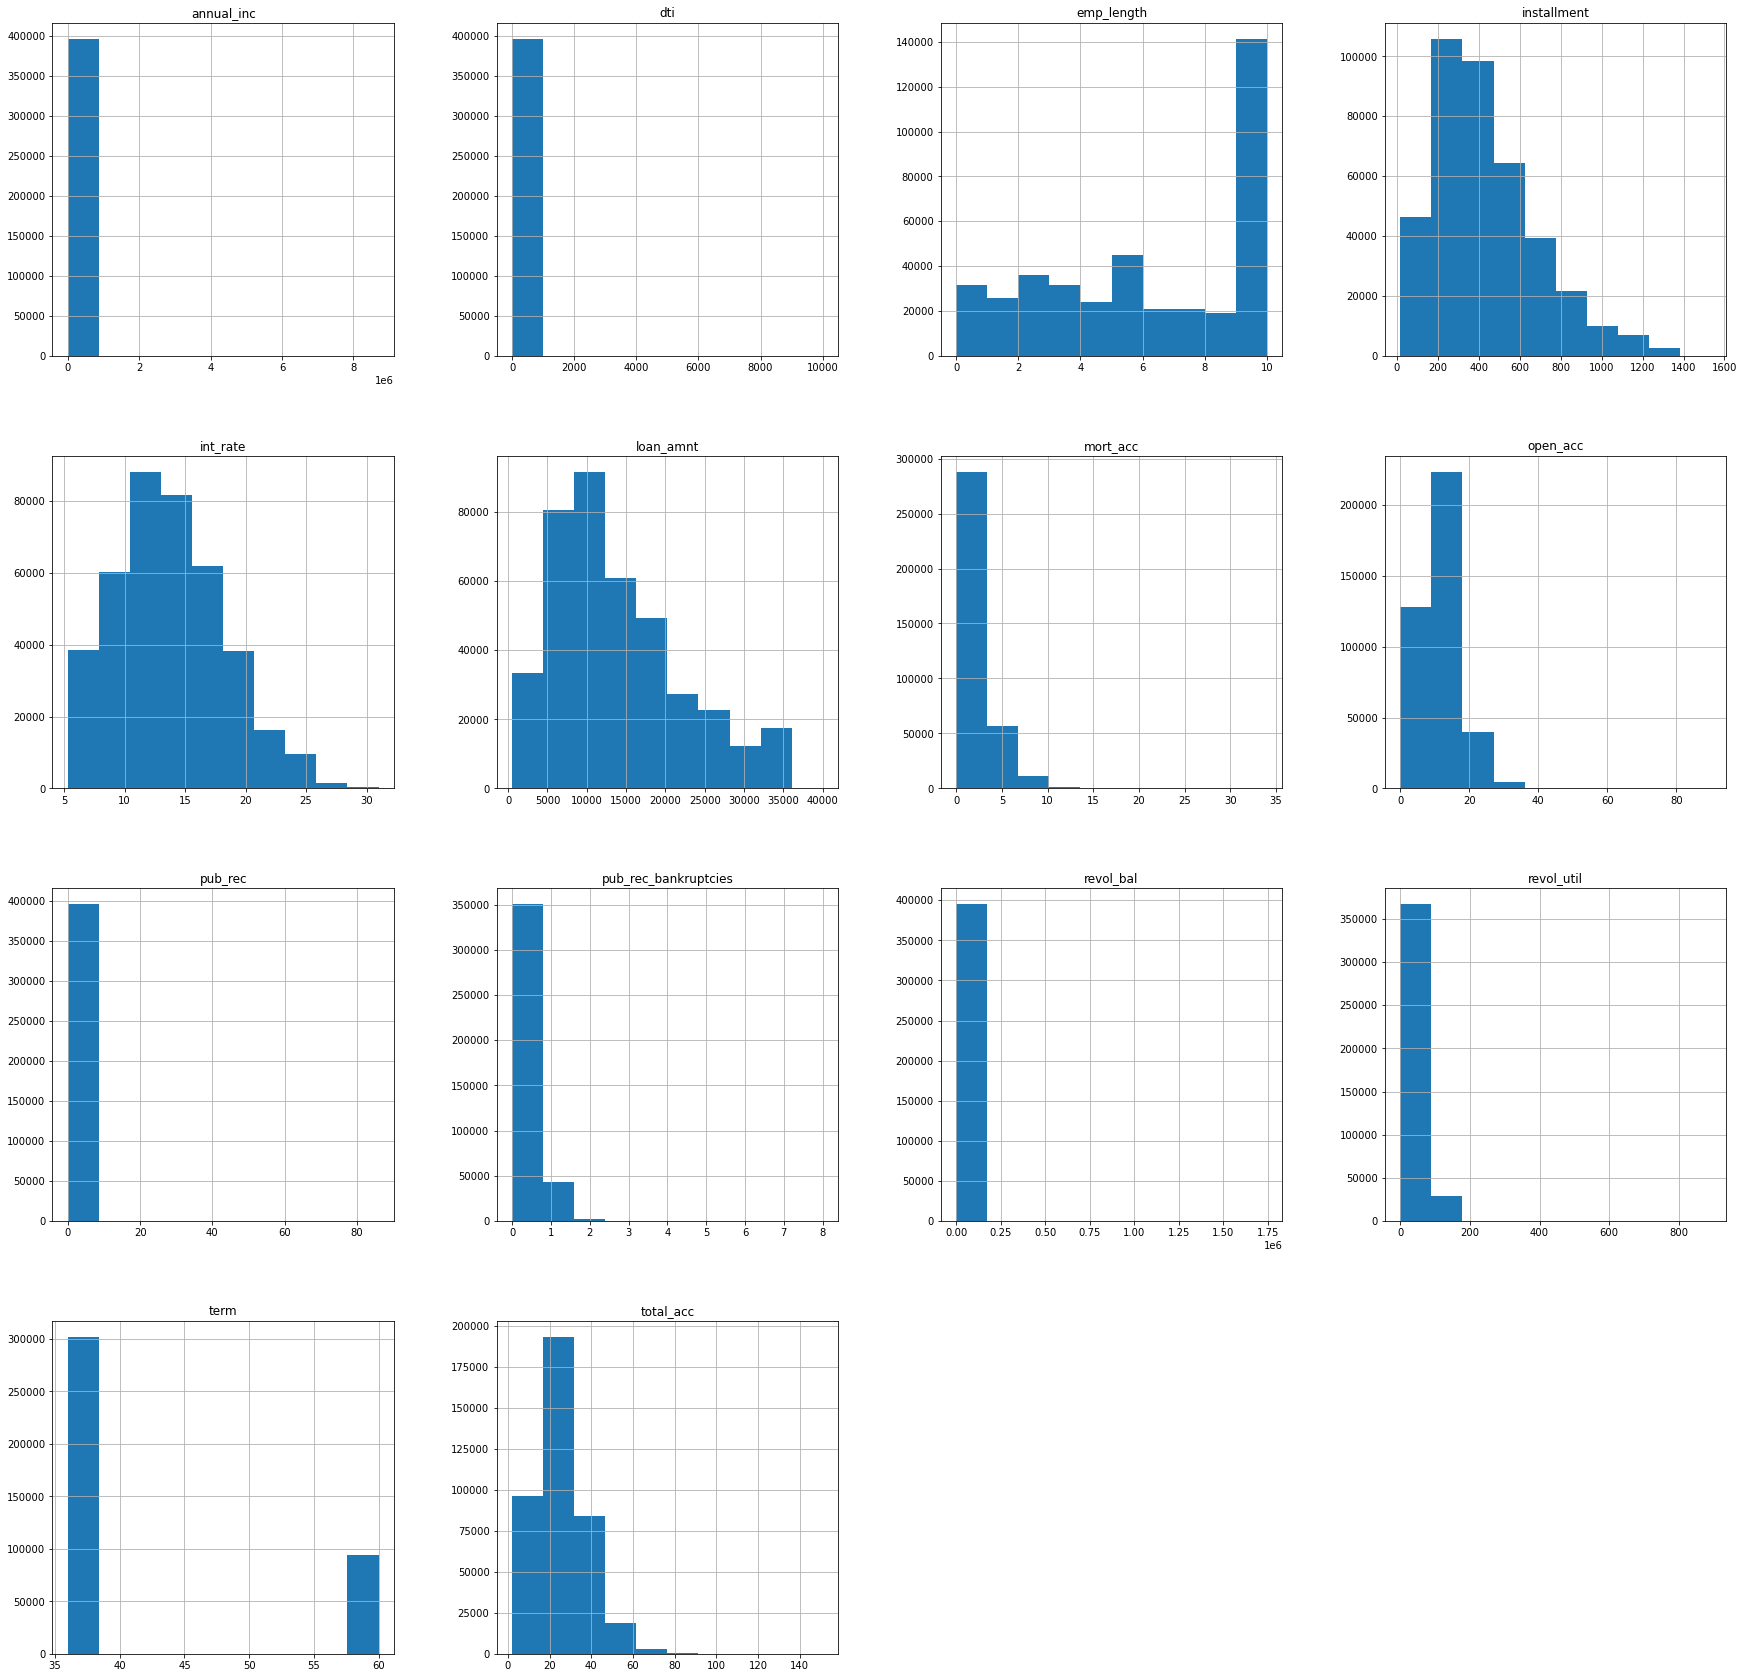

In [33]:
newdf.hist(figsize = (30,30),)
plt.show()

In [34]:
def plotcounplot(x):
    plt.figure(figsize = (7,7))
    sns.countplot(newdf[x])
    plt.show()
    print(newdf[x].value_counts()/len(newdf[x]*100))
    

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


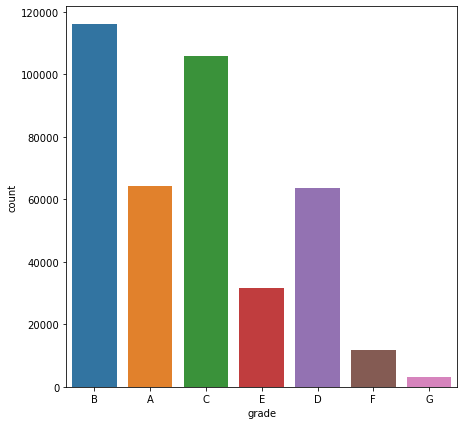

B    0.292953
C    0.267624
A    0.162076
D    0.160402
E    0.079509
F    0.029725
G    0.007712
Name: grade, dtype: float64


In [35]:
plotcounplot("grade")

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


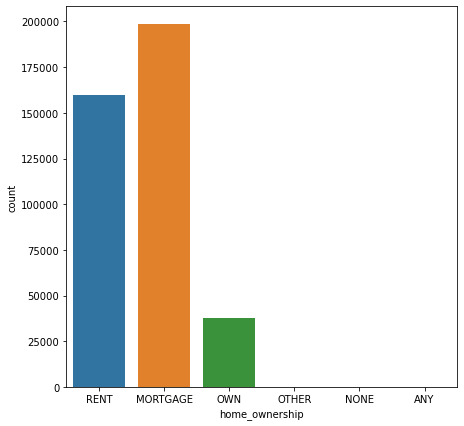

MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: home_ownership, dtype: float64


In [36]:
plotcounplot("home_ownership")

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


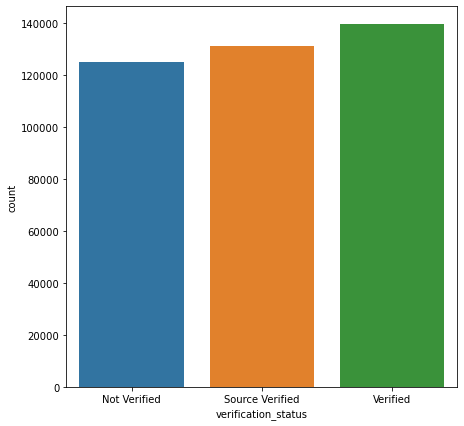

Verified           0.352405
Source Verified    0.331755
Not Verified       0.315840
Name: verification_status, dtype: float64


In [37]:
plotcounplot("verification_status")

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


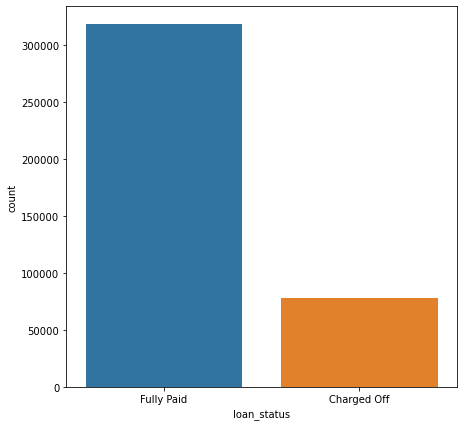

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64


In [38]:
plotcounplot("loan_status")

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


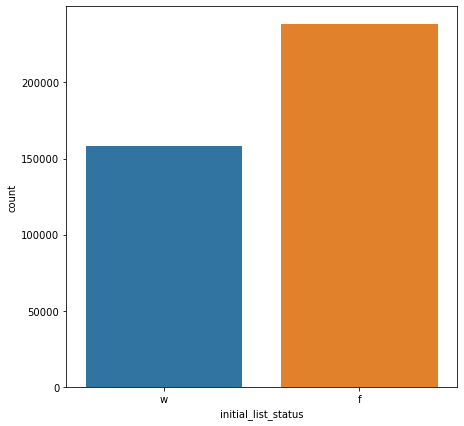

f    0.601131
w    0.398869
Name: initial_list_status, dtype: float64


In [39]:
plotcounplot("initial_list_status")

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


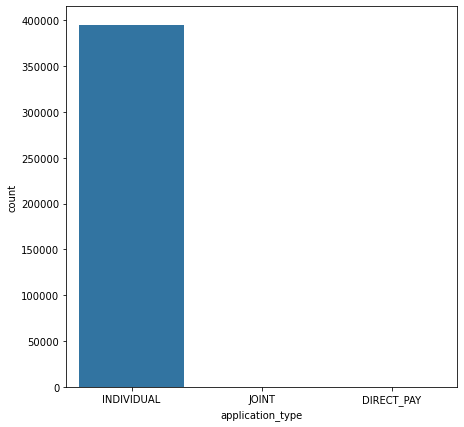

INDIVIDUAL    0.998205
JOINT         0.001073
DIRECT_PAY    0.000722
Name: application_type, dtype: float64


In [40]:
plotcounplot("application_type")

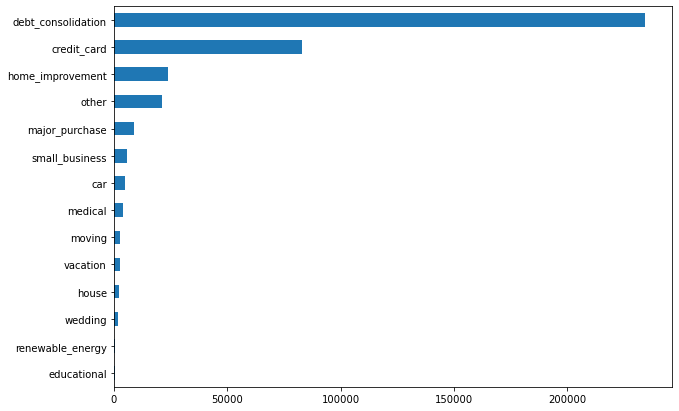

In [41]:
plt.figure(figsize = (10,7))
newdf["purpose"].value_counts().sort_values(ascending=True).plot(kind  = "barh")

plt.show()

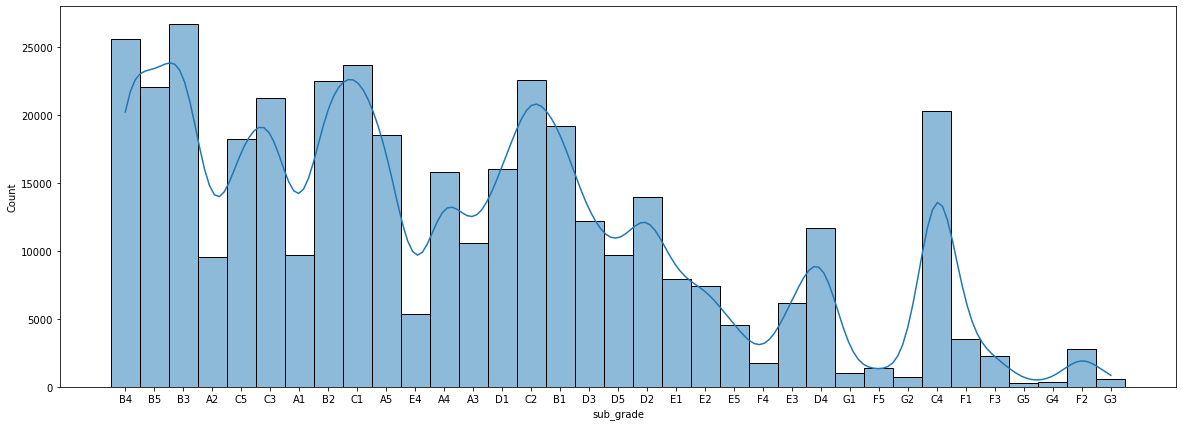

In [42]:
plt.figure(figsize=(20,7))
sns.histplot(newdf["sub_grade"] , kde = True)
plt.show()

In [43]:
text_column_list

['emp_title', 'Pincode']

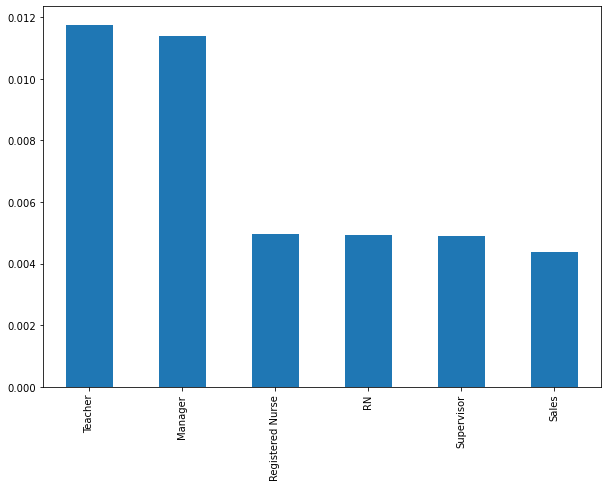

In [44]:
plt.figure(figsize = (10,7))
newdf["emp_title"].value_counts(normalize=True)[:6].plot(kind = "bar")

In [45]:
newdf["emp_title"].value_counts(normalize=True)

Teacher                              0.011764
Manager                              0.011391
Registered Nurse                     0.004974
RN                                   0.004948
Supervisor                           0.004905
                                       ...   
Kremers Urban Pharmaceuticals        0.000003
Gettysburg College                   0.000003
Behavior modification Specialists    0.000003
Six Flags Over Georgia               0.000003
assistant mechanic                   0.000003
Name: emp_title, Length: 173105, dtype: float64

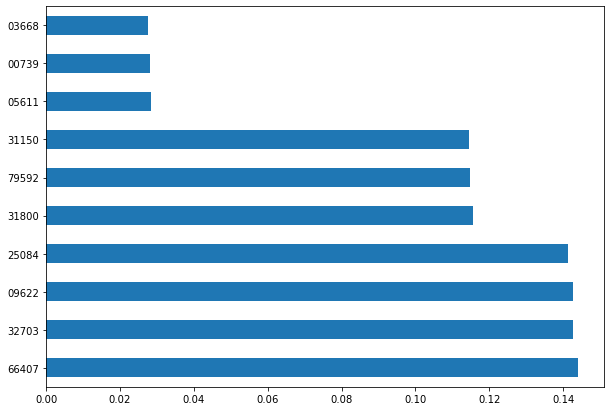

In [46]:
plt.figure(figsize = (10,7))
newdf["Pincode"].value_counts(normalize=True , sort=True , ascending=False).plot(kind = "barh")

In [47]:
newdf["Pincode"].value_counts(normalize=True , sort=True , ascending=False)*100

66407    14.389061
32703    14.278211
09622    14.273414
25084    14.119385
31800    11.570841
79592    11.481706
31150    11.464283
05611     2.834634
00739     2.815696
03668     2.772770
Name: Pincode, dtype: float64

# BI Variate Analysis

In [48]:
#sns.pairplot(newdf)

In [49]:
#sns.pairplot(newdf[numerical_column_list])

In [50]:
newdfcols

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'Pincode'],
      dtype='object')

In [51]:
newdf['loan_status'].replace(['Charged Off', 'Fully Paid'],
                        [0, 1] , inplace = True)

In [52]:
numerical_column_list.append("loan_status")
object_column_list.remove("loan_status")

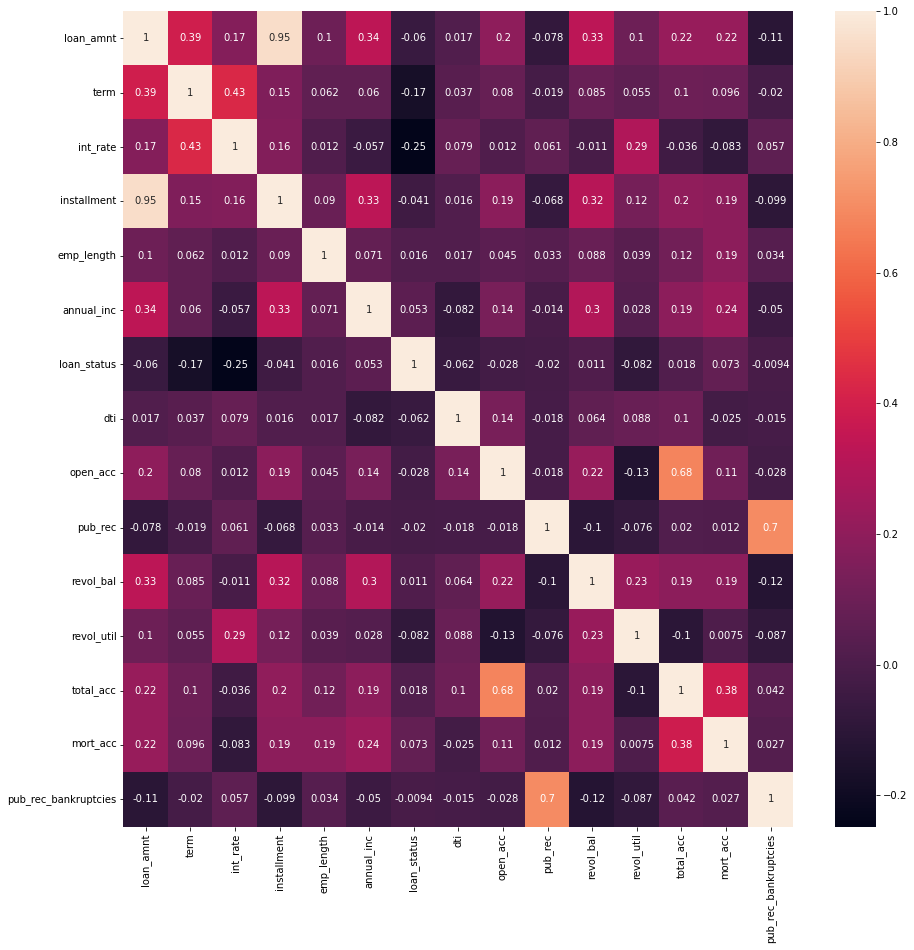

In [53]:
plt.figure(figsize = (15,15))
sns.heatmap(newdf.corr() , annot = True)

In [54]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

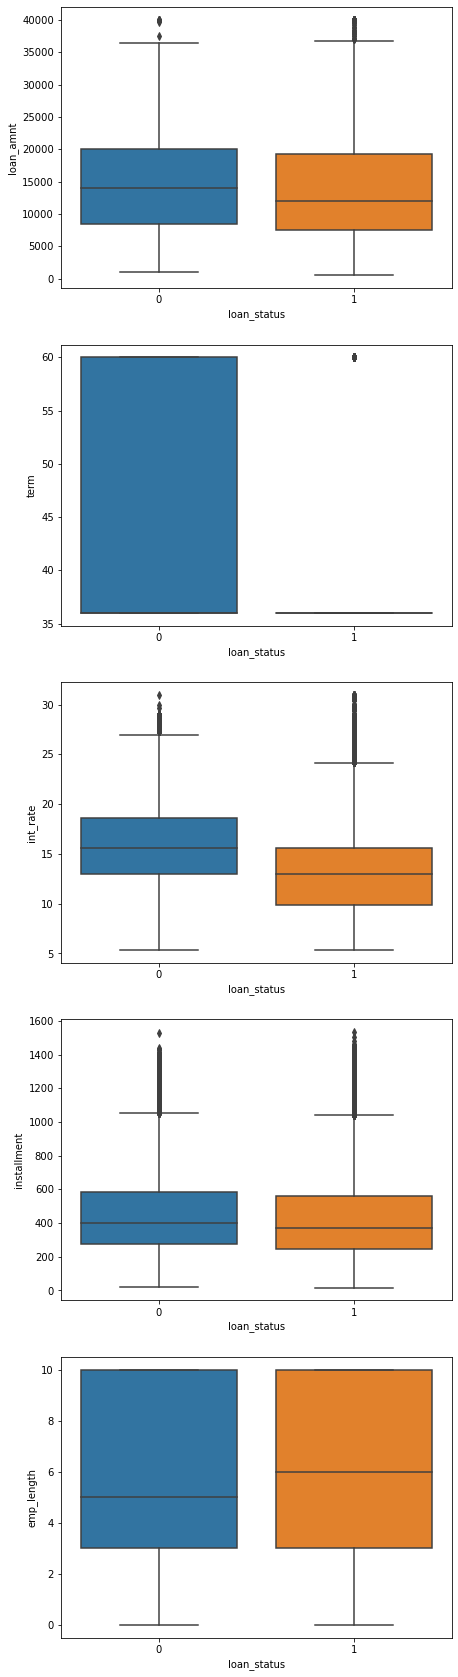

In [55]:
fig , ax = plt.subplots(5 , figsize = (7,30))
for i in range(5):
    
    sns.boxplot(newdf["loan_status"] , newdf[numerical_column_list[i]] , ax=ax[i])

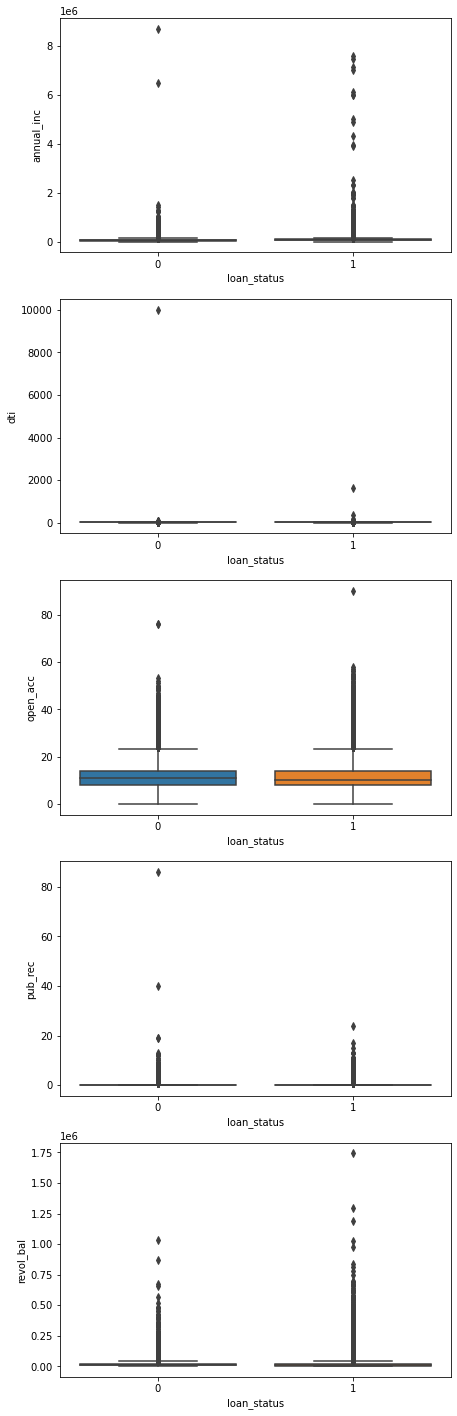

In [56]:
fig , ax = plt.subplots(5 , figsize = (7,25))
k=0
for i in range(5,10):
    
    sns.boxplot(newdf["loan_status"] , newdf[numerical_column_list[i]] , ax=ax[k])
    k+=1

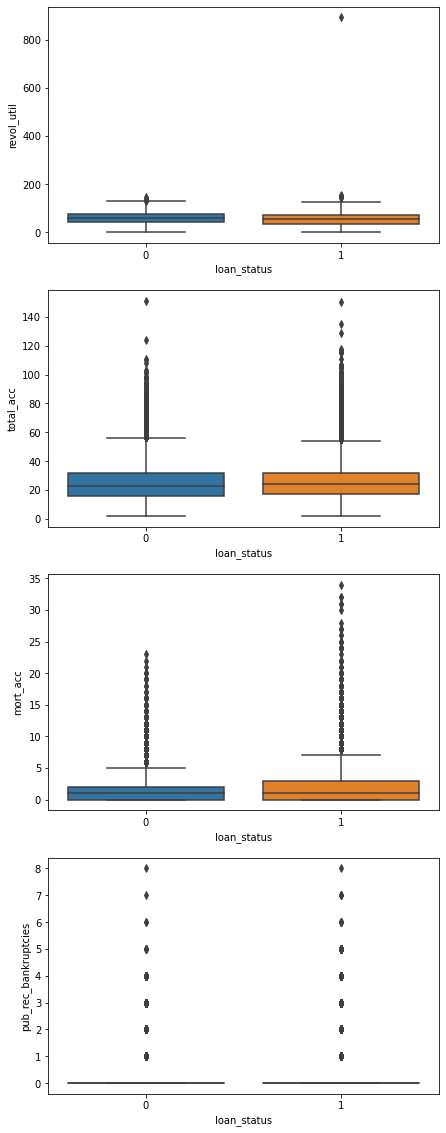

In [57]:
fig , ax = plt.subplots(4 , figsize = (7,20))
k=0
for i in range(10,14):
    
    sns.boxplot(newdf["loan_status"] , newdf[numerical_column_list[i]] , ax=ax[k])
    k+=1

In [58]:
object_column_list

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'Pincode']

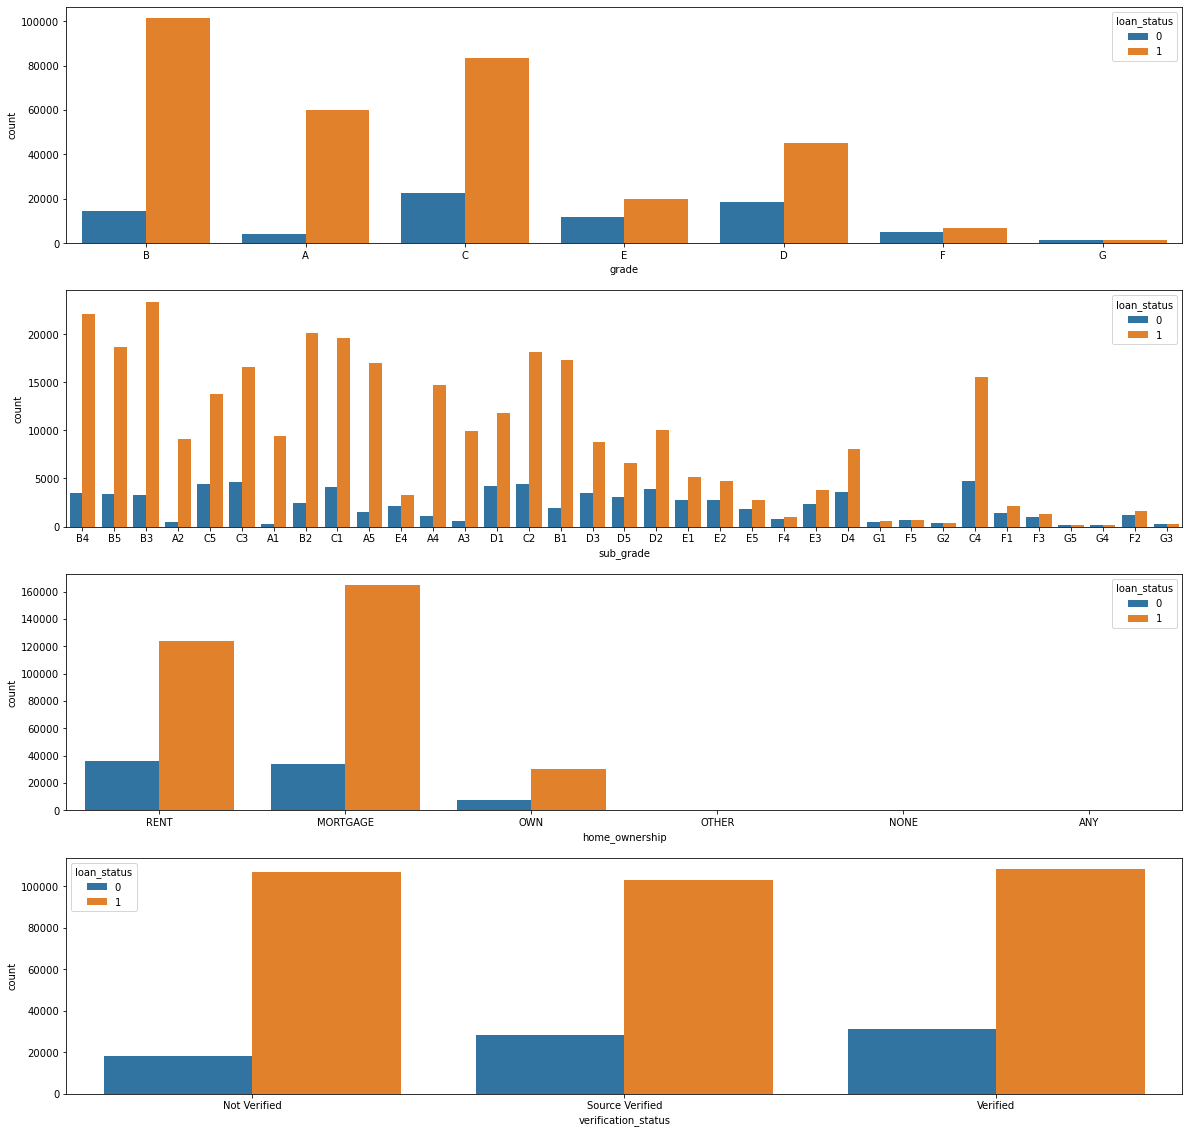

In [59]:
fig , ax = plt.subplots(4 , figsize = (20,20))
for i in range(4):
    
    sns.countplot(newdf[object_column_list[i]] ,hue = newdf["loan_status"] , ax=ax[i])


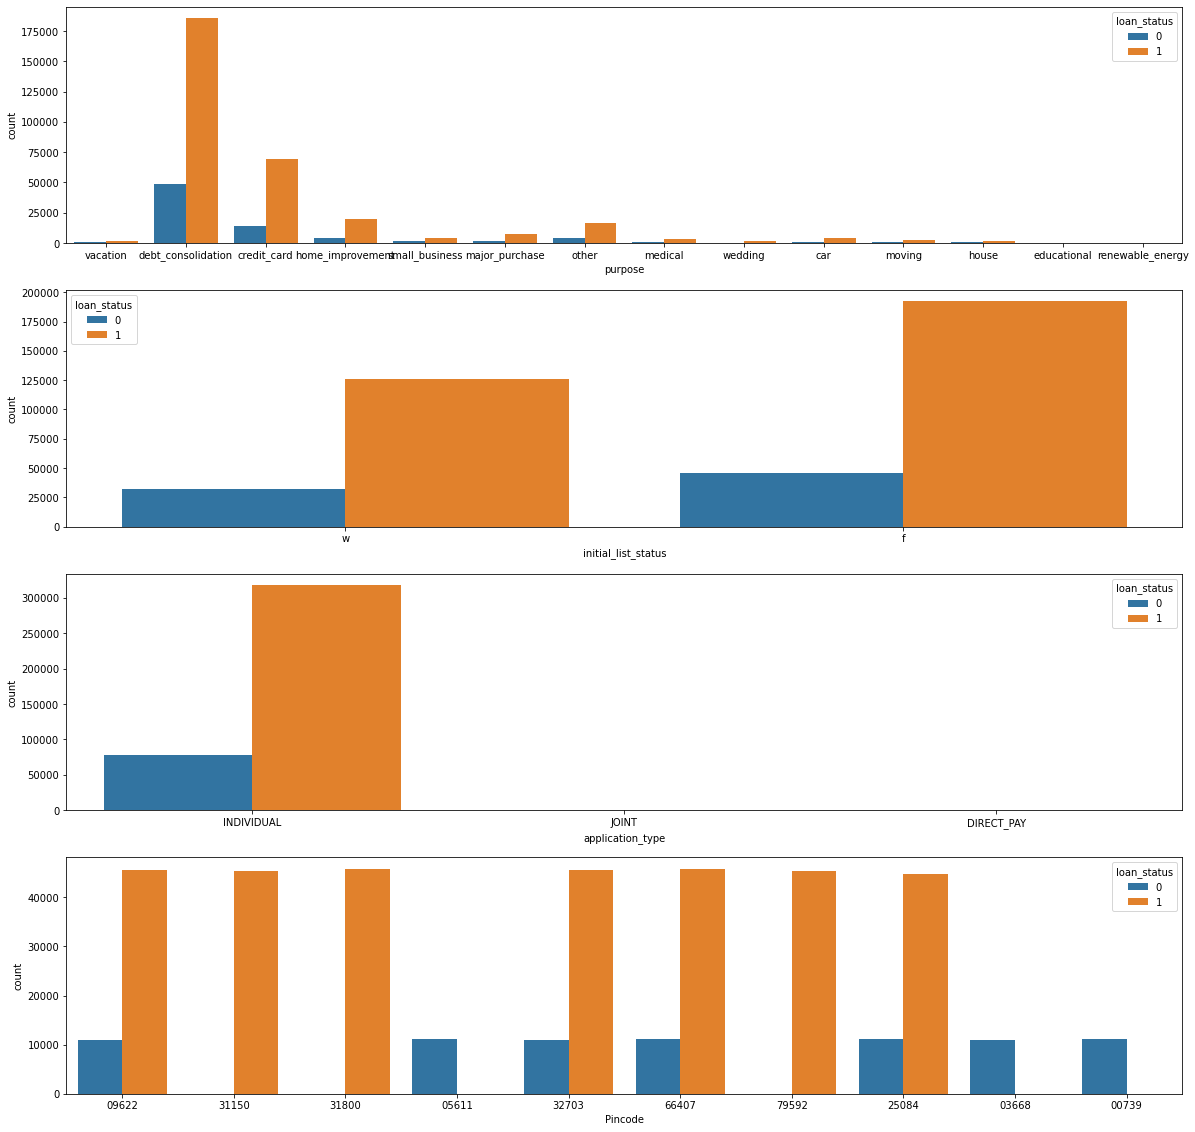

In [60]:
fig , ax = plt.subplots(4 , figsize = (20,20))
k=0
for i in range(4,8):
    sns.countplot(newdf[object_column_list[i]] ,hue = newdf["loan_status"] , ax=ax[k])
    k +=1

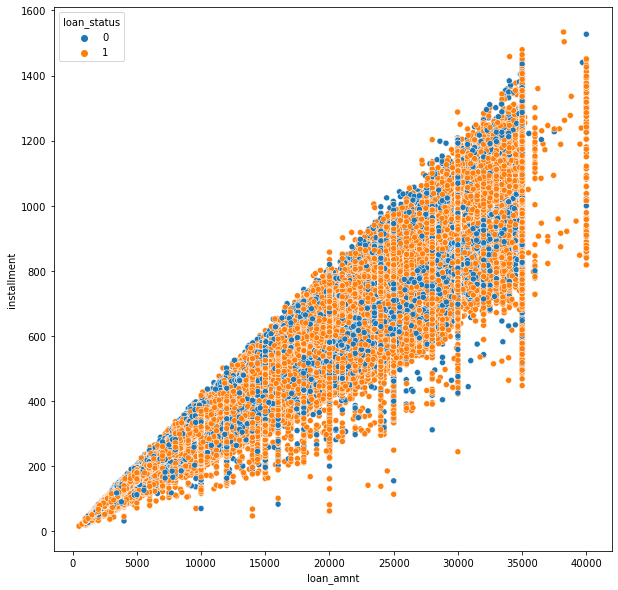

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(newdf["loan_amnt"] , newdf["installment"] , hue = newdf["loan_status"])

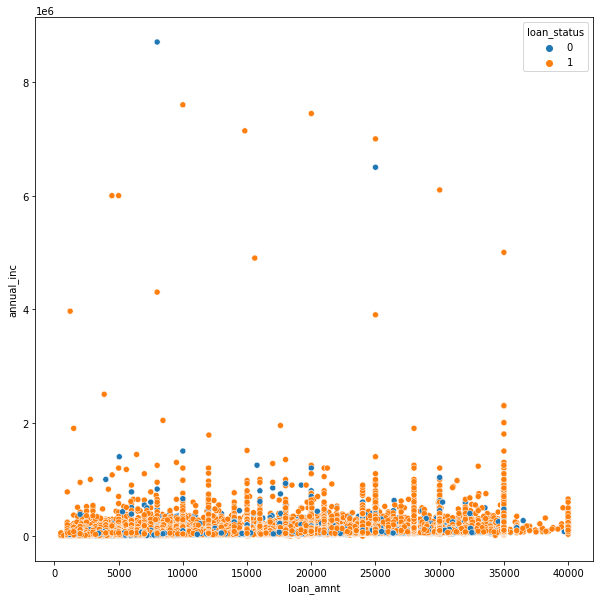

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(newdf["loan_amnt"] , newdf["annual_inc"] , hue = newdf["loan_status"])

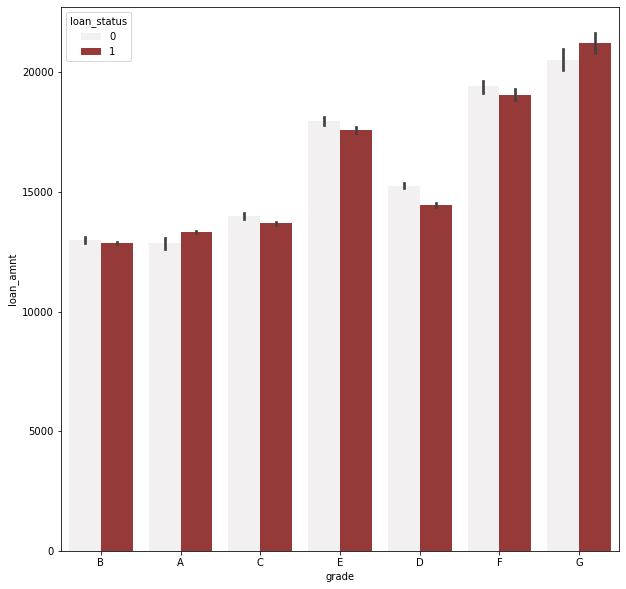

In [63]:
plt.figure(figsize=(10,10))


sns.barplot(newdf["grade"] , newdf["loan_amnt"] , hue = newdf["loan_status"] , color="brown")

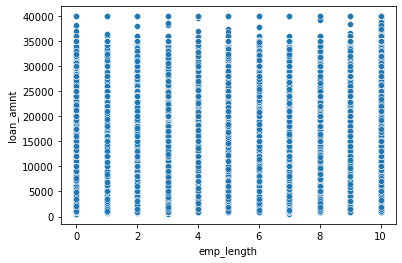

In [64]:
sns.scatterplot(newdf["emp_length"] , newdf["loan_amnt"])

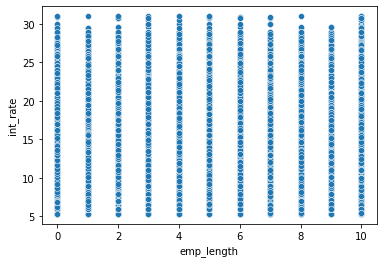

In [65]:
sns.scatterplot(newdf["emp_length"] , newdf["int_rate"])

In [66]:
numerical_column_list

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'loan_status']

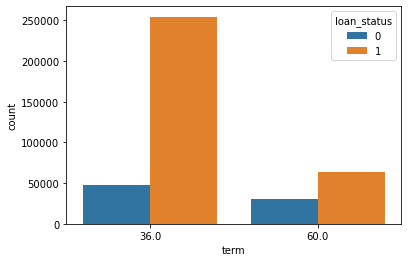

In [67]:
sns.countplot(newdf["term"] , hue = newdf["loan_status"])

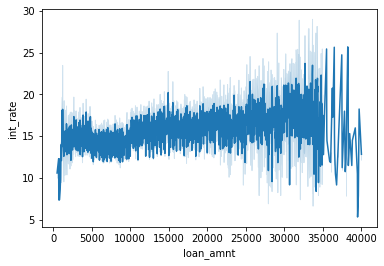

In [68]:
sns.lineplot(newdf["loan_amnt"] , newdf["int_rate"])

# Data Processing For Modelling

In [69]:
dfp = newdf.copy()

In [70]:
#dfp.drop("emp_title" ,axis = 1 ,inplace = True)

In [71]:
#dfp.drop("Pincode" ,axis = 1 ,inplace = True)

## Missing Value Treatment

In [72]:
dfp.isnull().sum( )

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
Pincode                     0
dtype: int64

In [73]:
dfp["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [74]:
dfp["pub_rec_bankruptcies"].fillna(value = 0,inplace=True)

In [75]:
dfp["mort_acc"].quantile(0.5)

1.0

In [76]:
dfp["mort_acc"].fillna(value = 1,inplace=True)

In [77]:
dfp["revol_util"].quantile(0.5)

54.8

In [78]:
dfp["revol_util"].fillna(value = 54.8 , inplace = True)

In [79]:
dfp["emp_title"].fillna("Unknown" , inplace = True)

## Flagging Columns

In [80]:
def flagconversion(x):
    if x <2 :
        return 0
    else :
        return 1

In [81]:
dfp["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [82]:
dfp["pub_rec"] = dfp["pub_rec"].apply(flagconversion)
dfp["pub_rec"].value_counts()

0    388011
1      8019
Name: pub_rec, dtype: int64

In [83]:
print(dfp["mort_acc"].value_counts())
dfp["mort_acc"] = dfp["mort_acc"].apply(flagconversion)
print(dfp["mort_acc"].value_counts())

0.0     139777
1.0      98211
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64
0    237988
1    158042
Name: mort_acc, dtype: int64


In [84]:
print(dfp["pub_rec_bankruptcies"].value_counts())
dfp["pub_rec_bankruptcies"] = dfp["pub_rec_bankruptcies"].apply(flagconversion)
print(dfp["pub_rec_bankruptcies"].value_counts())

0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
0    393705
1      2325
Name: pub_rec_bankruptcies, dtype: int64


## Feature Encoding 

In [85]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
dfp['grade']= label_encoder.fit_transform(dfp['grade'])
  
dfp['grade'].value_counts()

1    116018
2    105987
0     64187
3     63524
4     31488
5     11772
6      3054
Name: grade, dtype: int64

In [86]:
dfp.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'Pincode'],
      dtype='object')

In [87]:
dfp['sub_grade']= label_encoder.fit_transform(dfp['sub_grade'])

In [88]:
import category_encoders as ce
tenc=ce.TargetEncoder() 


In [89]:
dfp['initial_list_status']= label_encoder.fit_transform(dfp['initial_list_status'])

In [90]:
dfp["verification_status"]=tenc.fit_transform(dfp['verification_status'],dfp['loan_status'])

In [91]:
dfp["application_type"]=tenc.fit_transform(dfp['application_type'],dfp['loan_status'])

In [92]:
dfp["Pincode"]=tenc.fit_transform(dfp['Pincode'],dfp['loan_status'])

In [93]:
def changehomeownership(x):
    if x == "MORTGAGE":
        return x
    elif x== "RENT":
        return x
    elif x=="OWN":
        return x
    else: 
        return "OTHERS"


In [94]:
dfp["home_ownership"] = dfp["home_ownership"].apply(changehomeownership)

In [95]:
dfp["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHERS         146
Name: home_ownership, dtype: int64

In [96]:
def purposechange(x):
    if x =="debt_consolidation" or x=="credit_card" or x=="home_improvement":
        return x
    else: 
        return "others"


In [97]:
dfp["purpose"]= dfp["purpose"].apply(purposechange)

In [98]:
dfp["emp_title"]=tenc.fit_transform(dfp['emp_title'],dfp['loan_status'])

In [99]:
dfp["purpose"]=tenc.fit_transform(dfp['purpose'],dfp['loan_status'])

In [100]:
dfp["home_ownership"]=tenc.fit_transform(dfp['home_ownership'],dfp['loan_status'])

In [ ]:
# Endoded dfifferent with different Encoding techniques as per the business context.

In [101]:
dfp.shape

(396030, 24)

In [102]:
df_3 = dfp.copy()

In [103]:
df_3.shape

(396030, 24)

## Duplication Removal

In [104]:
df_3.duplicated(keep = False).sum()

0

In [105]:
# There are no duplicacy in the data set

## Outlier Treatment 

In [106]:
def HigherOutlierPercentage(col):
    median = df_3[col].quantile(0.5)
    lower = df_3[col].quantile(0.25)
    higher = df_3[col].quantile(0.75)
    iqr = higher-lower
    outlier_value_higher = higher+1.5*(iqr)
    percentage = len(df_3[df_3[col]>outlier_value_higher])/len(df_3[col])*100
    if percentage > 0:
        #print(col , "median :" , median ,"lower :" , lower, "higher :" , higher)
        print(col , "Percentage for Upper Outliers :" ,percentage , end = "\n\n" )

In [107]:
def LowerOutlierPercentage(col):
    median = df_3[col].quantile(0.5)
    lower = df_3[col].quantile(0.25)
    higher = df_3[col].quantile(0.75)
    iqr = higher-lower
    outlier_value_lower = lower-1.5*(iqr)
    percentage = len(df_3[df_3[col]<outlier_value_lower])/len(df_3[col])*100
    if percentage > 0:
        #print(col , "median :" , median ,"lower :" , lower, "higher :" , higher)
        print(col , "Percentage for Lower:" ,percentage , end = "\n\n" )

In [108]:
for i in df_3.columns:
    LowerOutlierPercentage(i)

emp_title Percentage for Lower: 6.869681589778552

loan_status Percentage for Lower: 19.61290811302174

application_type Percentage for Lower: 0.07221675125621797

Pincode Percentage for Lower: 8.42309926015706



In [109]:
for i in df_3.columns:
    HigherOutlierPercentage(i)

loan_amnt Percentage for Upper Outliers : 0.04822866954523647

term Percentage for Upper Outliers : 23.741888240789837

int_rate Percentage for Upper Outliers : 0.9537156276039694

installment Percentage for Upper Outliers : 2.8406938868267555

sub_grade Percentage for Upper Outliers : 1.1239047546903014

emp_title Percentage for Upper Outliers : 11.662500315632654

annual_inc Percentage for Upper Outliers : 4.216852258667273

dti Percentage for Upper Outliers : 0.06943918390020958

open_acc Percentage for Upper Outliers : 2.602580612579855

pub_rec Percentage for Upper Outliers : 2.0248466025301113

revol_bal Percentage for Upper Outliers : 5.368027674671111

revol_util Percentage for Upper Outliers : 0.0030300734792818723

total_acc Percentage for Upper Outliers : 2.1460495417013865

application_type Percentage for Upper Outliers : 0.10731510239123299

pub_rec_bankruptcies Percentage for Upper Outliers : 0.5870767366108629



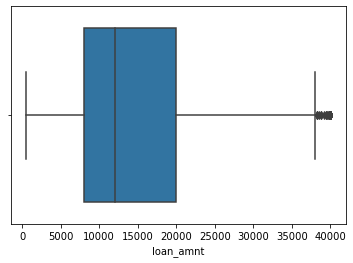

In [110]:
sns.boxplot(df_3["loan_amnt"])

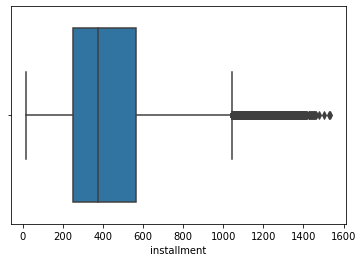

In [111]:
sns.boxplot(df_3["installment"])

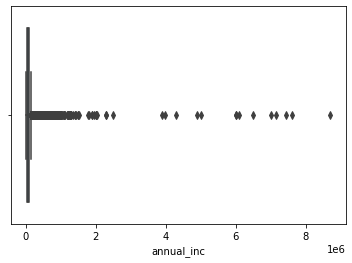

In [112]:
sns.boxplot(df_3["annual_inc"])

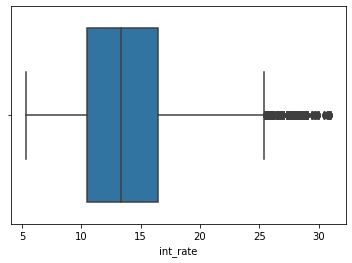

In [113]:
sns.boxplot(df_3["int_rate"])

### According to the outlier analysis, there is no need to delete the outliers as they contain information regarding the customers with high annual income, high interest rates and high loan amount. This should be learnt by the Model to increase accuracy metric.

# Modelling

In [262]:
dfm = df_3.copy()

In [263]:
dfm.shape

(396030, 24)

In [264]:
X = dfm.drop("loan_status" , axis = 1)

In [265]:
y = dfm["loan_status"]

In [266]:
X.shape

(396030, 23)

In [267]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237618, 23)

In [268]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [269]:
y_train

92797     0
2381      1
69422     1
188213    1
64544     1
         ..
309048    0
392064    1
211701    1
211606    1
319836    1
Name: loan_status, Length: 237618, dtype: int64

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [271]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [272]:
coefficients = model.coef_

In [273]:
X_col = X.columns
for i in range(len(X_col)):
    print(X_col[i], ":" , coefficients[0][i] )

loan_amnt : -0.07984138749048322
term : -0.18287091093224322
int_rate : 0.16353662191253096
installment : 0.003579611684877518
grade : -0.060930176647189596
sub_grade : -0.5280830138011712
emp_title : 0.7110678909274989
emp_length : 0.043097960703501394
home_ownership : 0.13918480589766496
annual_inc : 0.10410584564958057
verification_status : 0.05964708199654342
purpose : 0.025038163818508288
dti : -0.1861301959400475
open_acc : -0.14691330921316237
pub_rec : -0.018259421863788344
revol_bal : 0.06921755541618374
revol_util : -0.12212032722728709
total_acc : 0.11454437632388978
initial_list_status : 0.028893820484418013
application_type : 0.012822734402372858
mort_acc : 0.021806543709655474
pub_rec_bankruptcies : 0.0032725517034161767
Pincode : 8.865541749408411


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

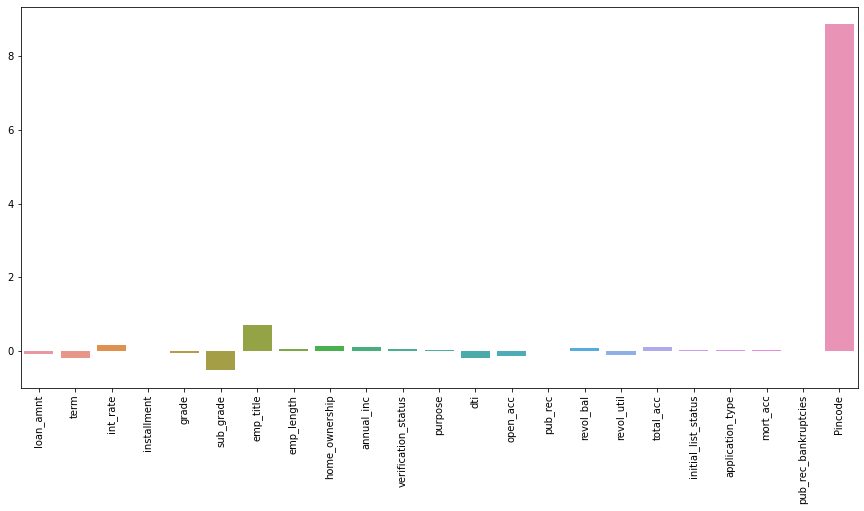

In [274]:

plt.figure(figsize = (15,7))
sns.barplot(X_col , coefficients[0])
plt.xticks(rotation=90)


In [275]:
model.intercept_

array([1.67509667])

In [276]:
model.score(X_train , y_train)

0.8949237852351253

In [277]:
model.score(X_val , y_val)

0.8957149710880489

In [278]:
model.score(X_test , y_test)

0.8984799131378935

In [279]:
y_pred = model.predict(X_test)


In [280]:
prob = model.predict_proba(X_test)

In [281]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 8270,  7074],
       [  967, 62895]])

In [282]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix)

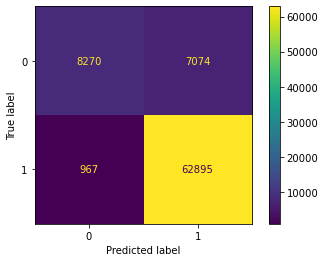

In [283]:
disp.plot()

In [284]:
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,roc_curve

In [285]:
precision_score(y_test , y_pred)

0.8988980834369507

In [286]:
recall_score(y_test , y_pred)

0.9848579750086123

In [287]:
f1_score(y_test , y_pred)

0.9399167606907218

In [288]:
roc_auc_score(y_test , prob[:,1])

0.9259485457661591

In [309]:
# According to the above modelling , we have got good results with Lambda as 1.

# We will try to tune it tp achieve better results 

## Hyperparameter Tuning 

In [289]:
val_scores=[]
train_scores = []
lambda_val = np.arange(0.01, 1000,10)
for i in lambda_val:
    lgmodel = LogisticRegression(C=1/i)
    lgmodel.fit(X_train , y_train)
    train_score = lgmodel.score(X_train ,y_train)
    train_scores.append(train_score)
    val_score = lgmodel.score(X_val,y_val)
    val_scores.append(val_score)


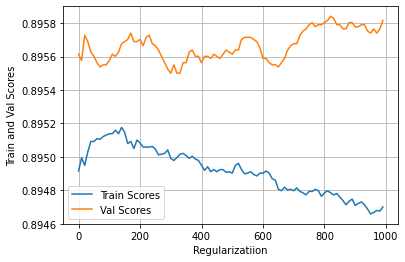

In [290]:
plt.plot(lambda_val ,train_scores , label = "Train Scores")
plt.plot(lambda_val ,val_scores , label = "Val Scores")
plt.xlabel("Regularizatiion")
plt.ylabel("Train and Val Scores")
plt.legend()
plt.grid()

In [310]:
# As the value_scores is the highest at 82 index, we will take it as lambda for further modelling

In [291]:
np.argmax(val_scores)

82

In [292]:
bestfit = lambda_val[np.argmax(val_scores)]

In [293]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=1/bestfit)
model1.fit(X_train, y_train)
model1.score(X_train , y_train)

0.8947849068673248

In [294]:
model1.score(X_val , y_val)

0.8958412241496856

In [295]:
model1.score(X_test , y_test)

0.8975835164002727

In [296]:
model.score(X_test , y_test)

0.8984799131378935

In [297]:
y_pred1 = model1.predict(X_test)

In [307]:
coefficients1 = model1.coef_
X_col = X.columns
for i in range(len(X_col)):
    print(X_col[i], ":" , coefficients1[0][i] )

loan_amnt : -0.057331638756535276
term : -0.17918923385580796
int_rate : -0.014136307822686246
installment : -0.005213038713195186
grade : -0.14687752281028357
sub_grade : -0.25468011219904857
emp_title : 0.6483608131358751
emp_length : 0.04145476614852042
home_ownership : 0.12785366739231951
annual_inc : 0.07142590261417056
verification_status : 0.057525049643186214
purpose : 0.0239657649429149
dti : -0.18107335804957628
open_acc : -0.12290948632394773
pub_rec : -0.016126909401112565
revol_bal : 0.06199829593204554
revol_util : -0.10650566126754789
total_acc : 0.09661451968265193
initial_list_status : 0.01906593525516842
application_type : 0.009107363808688401
mort_acc : 0.030801914137681703
pub_rec_bankruptcies : 0.0021831356621027326
Pincode : 2.460582838675901


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

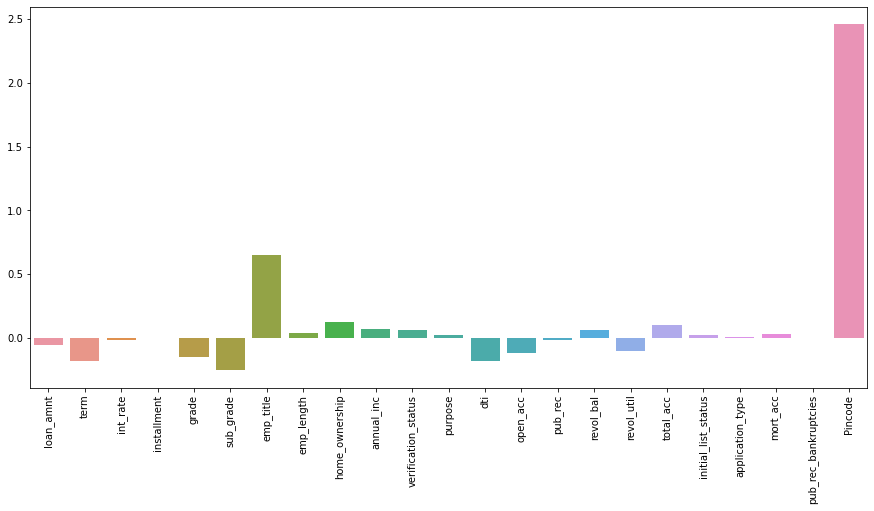

In [308]:

plt.figure(figsize = (15,7))
sns.barplot(X_col , coefficients1[0])
plt.xticks(rotation=90)

In [298]:
conf_matrix1 = confusion_matrix(y_test , y_pred1)

In [299]:
conf_matrix1

array([[ 7820,  7524],
       [  588, 63274]])

In [300]:
precision_score(y_test , y_pred1)

0.8937258114636006

In [301]:
recall_score(y_test , y_pred1)

0.9907926466443269

In [302]:
f1_score(y_test , y_pred1)

0.9397593940294074

In [303]:
prob1 = model1.predict_proba(X_test)
roc_auc_score(y_test,prob1[:,1])

0.9226960896098009

In [304]:
fpr, tpr, thr = roc_curve(y_test, prob1[:,1])

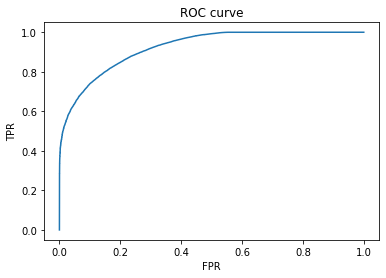

In [305]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

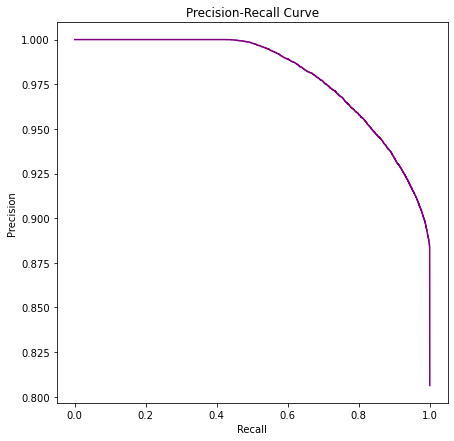

In [306]:
#calculate precision and recall
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, prob[:,1])
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

# Modelling Analysis 

Following are the Metric Scores:
-	Precision: 0.89
-	Recall: 0.99
-	F1 Score: 0.93
-	AUC Score:0.92
    
    
    So far, we have achieved great results with model optimisation. As all the key metrics are nearly 90.
    Precision should be high to prevent loans disbursement to defaulters.
    Recall should be high to prevent denying loans to genuine customers which adds value to our revenue.
    hence, F1 should be used.
    
    As the Auc score is high , it suggests that the model is workiing well and can be used in deploymemt.
    Precision can be optimised by 2-3% by bringing down recall from 99% to 92.5%.
   




Insights:

1.	Annual income range between 0-10,00,000 for the current customers.
2.	DTI ranges from 0-1000 for current customers.
3.	There is a variety of different employment length for the customers, highest being the 10+ years. It is distributed almost equally between 0-10 years.
4.	Installment amount follows skewed normal distribution with peak between 200-400.
5.	There are higher chances for customers to get interest rate between 10-15%, but it ranges from 5-25%
6.	Most number of loan amounts are between the range 5-10k
7.	Very high percentage of loans are being lend for 36 months
8.	29% customers are put into B-Grade Category
9.	0.7% customers are put into G-Grade Category.
10.	 50% customers have mortgage and 40% are on rent.
11.	 80% loan tap customers have fully paid the loans, which is very high in comparison to the charged off loans.
12.	 99% applications for loans are individual type.
13.	 Teachers and Managers are the two most common professions seeking for loans.
14.	 Loan amount and Interest rate, installment amount is higher in the case of Charged off loans than fully paid loans.
15.	 There is high risk of NPA cases in F and G category customers.
16.	 There is low risk on NPA cases when loans are taken with debt consolidation, credit card and home improvement purpose.
17.	 Customers from the following Pin code/Geographical Locations are likely to be defaulters: 05611,03668,00739.
18.	 As the loan amount is increased, installment amount increases linearly.
19.	 Risk for F and G category is high, as they have high loan amounts and higher installments.
20.	 Loan amount and Annual Income does not have high correlation.
21.	Loan amount is not dependent on employment length.
22.	 There is low risk in 36-month installment scheme.


23.	 It has been observed that geographical location could be a critical measure for distinguishing between Low risk and High-risk clients.
24.	Following are the Metric Scores:
-	Precision: 0.89
-	Recall: 0.99
-	F1 Score: 0.93
-	AUC Score:0.92

Recommendations:
1.	The data presented is highly imbalanced. It is recommended to gather more information for the NPA customers. 
2.	High risk analysis should be done for F and G category customers as they induce high chances of NPA’s for the organization.
3.	Less chances are for NPA’s for customers with Credit card, Debt Consolidation and Home Improvement purposes. Hence, loans can be provided with due diligence.
4.	Customers from the following Pin code/Geographical Locations are likely to be defaulters: 05611,03668,00739. Hence, High risk analysis is recommended for these locations.
5.	Higher the Loan amount and interest rate, higher are the chances for NPA’s. High loan amount should only be provided to customers with high Annual income and Employment length.
6.	So far, we have achieved great results with model optimisation. As all the key metrics are nearly 90. Precision should be high to prevent loans disbursement to defaulters. Recall should be high to prevent denying loans to genuine customers which adds value to our revenue. Hence, F1 Score is recommended.
7.	As the Auc score is high, it suggests that the model is working well and can be used in deployment.
8.	Precision can be optimized by 2-3% by bringing down recall from 99% to 92.5%.




Trade-off Questions:

1.	How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. 

Ans: According to our labelling, Recall should be high in this case.

2.	Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 

Ans: According to our labelling Precision should be high in this case, as we need to minimize the risk for giving loans to defaulters.
